# **Iris Flowers Classification using Logistic Regression**

![Flower Image](images/flower.jpg)

The objective of this work is to develop a classification model capable of accurately determining the species of an Iris flower based on the dimensions of various parts of the flower. The classification task is binary, with two distinct classes: virginica and non-virginica. By utilizing machine learning techniques, the aim is to train a model that can effectively distinguish between these two species of Iris flowers based on their physical characteristics.

### **I - Getting the data**

**Data Set Characteristics:**

* Number of Instances: 150 (50 in each of three classes)

* Number of Attributes: 4 numeric, predictive attributes and the class

* Attribute Information:
    - Sepal Length in cm
    - Sepal Width in cm
    - Petal Length in cm
    - Petal Width in cm

        Class:
        - Iris-Setosa
        - Iris-Versicolour
        - Iris-Virginica

The Iris plants dataset is a well-known dataset in the field of pattern recognition. It was first introduced by R.A. Fisher and was taken from his paper. This dataset is widely used in literature for pattern recognition and machine learning tasks. It consists of 150 instances, each with four numeric attributes and a corresponding class label. The classes represent three types of iris plants: Iris-Setosa, Iris-Versicolour, and Iris-Virginica.

In [4]:
# Importing pandas and the iris dataset from scikit-learn
import pandas as pd
from sklearn import datasets

# Loading the iris dataset with 'as_frame=True' to return the data as a pandas DataFrame
# Setting 'scaled=False' to keep the original feature scales, as we may need them for interpretation
data = datasets.load_iris(as_frame=True)

In [5]:
# Calling the 'keys()' method on the 'data' object to inspect available keys or attributes in the dataset.
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# Extracting the 'data' attribute from the 'data' object and assigning it to the DataFrame 'df'.
# Adding a new column 'target' to 'df' and populating it with values from the 'target' attribute in the 'data' object.
df = data['data']
df['target'] = data['target']
df['target_names'] = df['target'].apply(lambda x: data["target_names"][x])

In [7]:
# Display few samples
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
# Data shape
print(df.shape)

(150, 6)


In [9]:
# Displaying concise information about the DataFrame 'df' using the 'info()' method.
# This helps identify the presence of missing values or null values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_names       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [10]:
df['target_names'].value_counts()

target_names
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
# Redefine targets as virginica and non-virginica
df['target_names'] = df['target_names'].apply(lambda x: 'virginica' if x == 'virginica' else 'non-virginica')
df['target'] = df['target'].apply(lambda x: 1 if x == 2 else 0)

In [12]:
df['target_names'].value_counts()

target_names
non-virginica    100
virginica         50
Name: count, dtype: int64

### **II - Exploratory Data Analysis (EDA)**

In [13]:
# Importing plotting libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings during execution
import warnings
warnings.filterwarnings("ignore")

#### **1. Statistics**

In [14]:
# Virginica stats
df[df["target"] == 1][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [15]:
# Non-Virginica
df[df["target"] == 0][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


So, when we look at the statistics for the Virginica and Non-Virginica iris plants following are the findings:

**Size Difference**s:

Virginica flowers tend to be larger overall. Their petals and sepals are generally longer and wider compared to the other type, Non-Virginica.

**Consistency**:

With Virginica flowers, they're pretty consistent in size. The sizes of their petals and sepals don't vary too much from one flower to another. On the other hand, with Non-Virginica, there's more variety. Some have big petals, some small, making them a bit more unpredictable in size.

**Range**:

Imagine we're sorting these flowers by size. With Virginica, the sizes are spread out nicely. You'll find some with really long petals and some with slightly shorter ones, but they all fit within a certain range. With Non-Virginica, there's a wider range of sizes. You might find some with really short petals and some with medium-sized ones all mixed together.

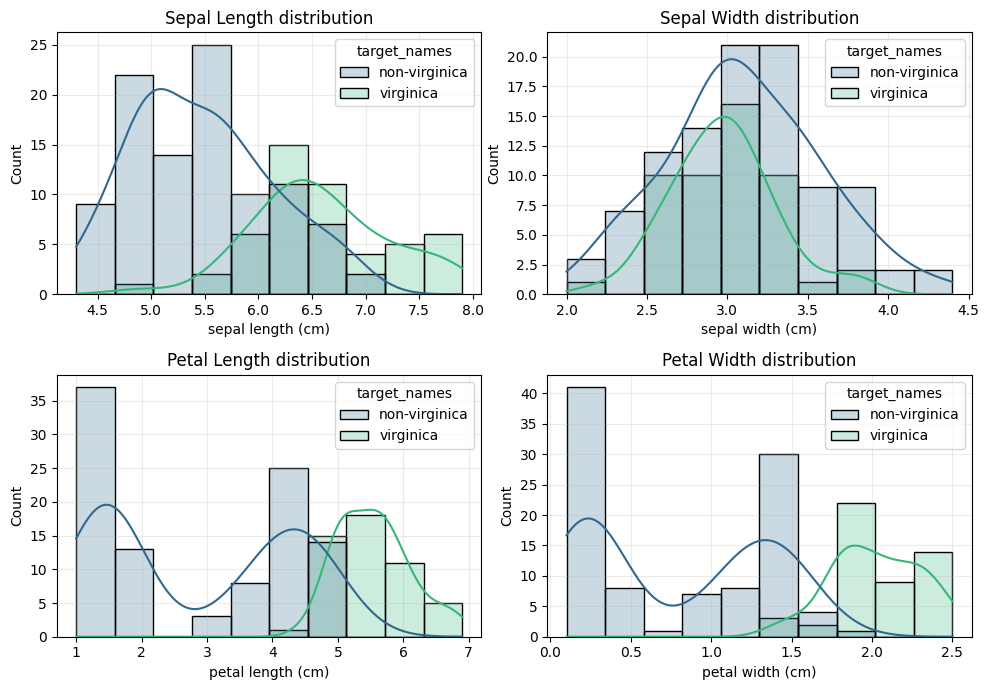

In [16]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.histplot(data=df, x="sepal length (cm)", hue="target_names", kde=True, alpha=0.25, bins=10, palette='viridis')
plt.title("Sepal Length distribution")
plt.grid(alpha=0.25)
plt.subplot(2,2,2)
sns.histplot(data=df, x="sepal width (cm)", hue="target_names", kde=True, alpha=0.25, bins=10, palette='viridis')
plt.title("Sepal Width distribution")
plt.grid(alpha=0.25)
plt.subplot(2,2,3)
sns.histplot(data=df, x="petal length (cm)", hue="target_names", kde=True, alpha=0.25, bins=10, palette='viridis')
plt.title("Petal Length distribution")
plt.grid(alpha=0.25)
plt.subplot(2,2,4)
sns.histplot(data=df, x="petal width (cm)", hue="target_names", kde=True, alpha=0.25, bins=10, palette='viridis')
plt.title("Petal Width distribution")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

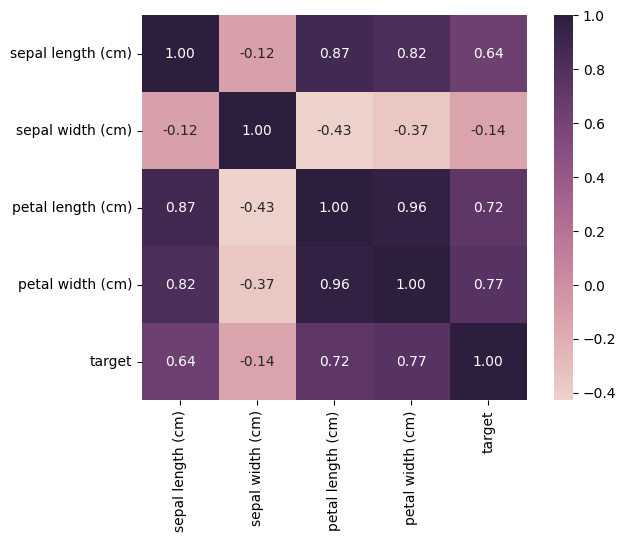

In [17]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']].corr(), annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True),fmt=".2f")
plt.show()

When we talk about correlation, we're essentially looking at how two things relate to each other. In this case, we're exploring how different parts of the iris flowers relate to each other in terms of their sizes.

**Sepal Length and Petal Length**:

There is a strong positive correlation of about 0.87 between the length of the sepals and the length of the petals. This means that as the sepal length increases, the petal length tends to increase as well. It's like saying when one part of the flower grows longer, the other part tends to grow longer too.

**Sepal Length and Petal Width**:

There's also a strong positive correlation, around 0.82, between the sepal length and the width of the petals. So, when the sepals are longer, the petals also tend to be wider. It's like noticing that when the petals are longer, they're usually wider too.

**Petal Length and Petal Width**:

Here, we see a very strong positive correlation, nearly 1. This means that as the length of the petals increases, their width tends to increase almost in sync. It's like saying when the petals are longer, they also tend to be wider, and vice versa.

**Sepal Width**:

Interestingly, the width of the sepals doesn't seem to have a strong correlation with the other measurements. Its correlation values with other features are quite low, around -0.12 to -0.43. This suggests that changes in sepal width don't have a strong impact on the sizes of other parts of the flower.

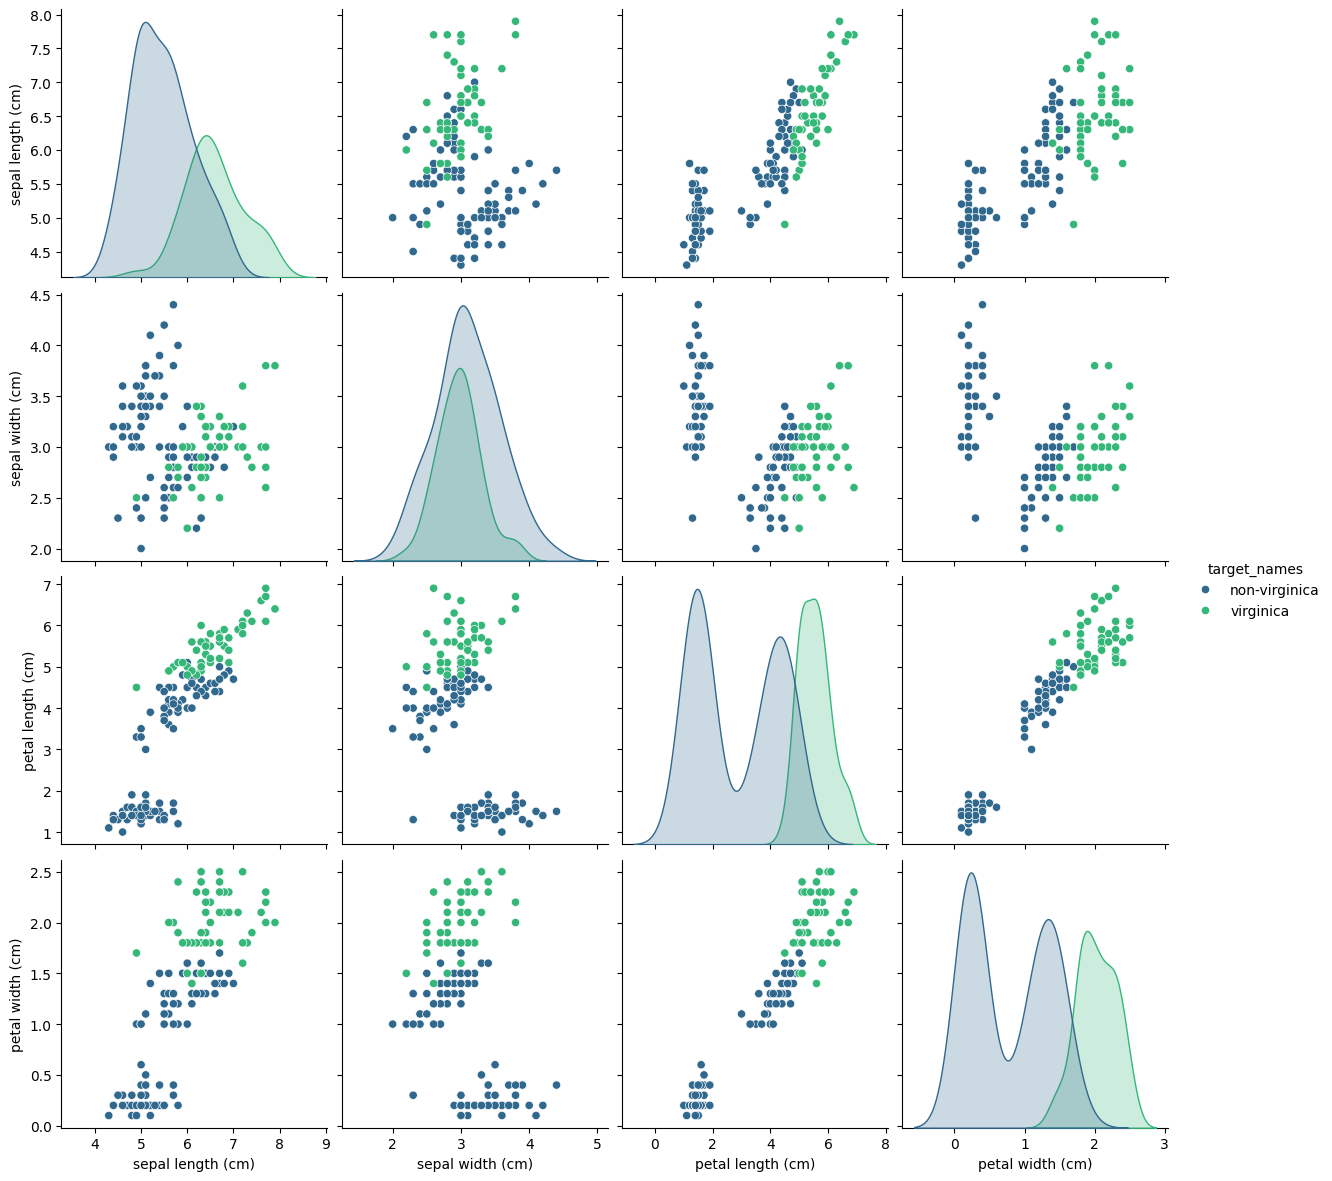

In [18]:
sns.pairplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target_names']], hue="target_names", size=3, palette="viridis")
plt.show()

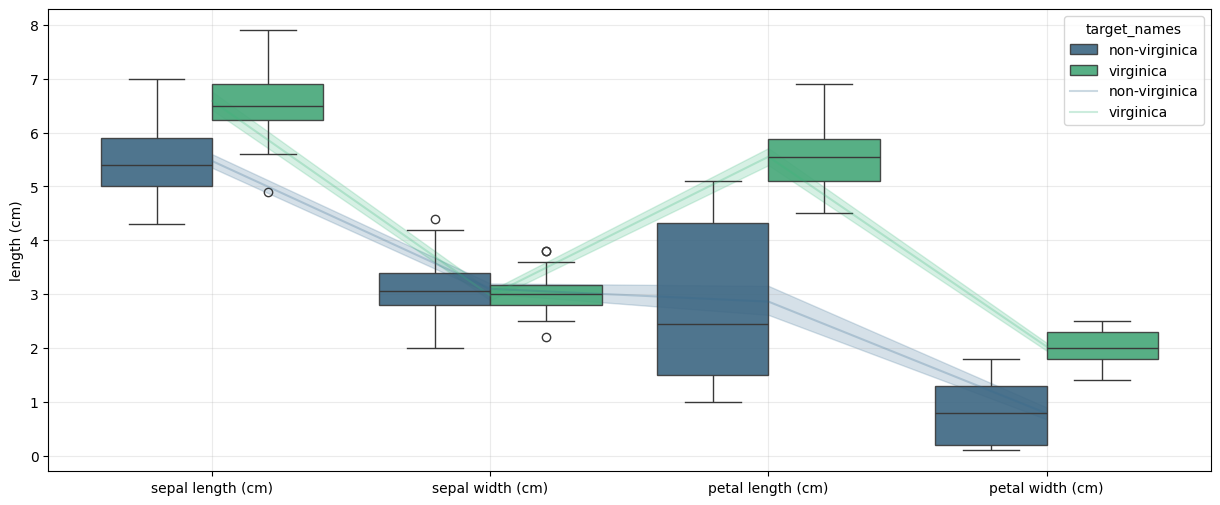

In [19]:
plt.figure(figsize=(15,6))
df_temp = df.melt(id_vars=['target', 'target_names'], var_name="length type", value_name="length (cm)")
sns.boxplot(data=df_temp, x="length type", y="length (cm)", hue="target_names", palette="viridis", boxprops=dict(alpha=0.9))
sns.lineplot(data=df_temp, x="length type", y="length (cm)", hue="target_names", palette="viridis", alpha=0.25)
plt.xlabel(None)
plt.grid(alpha=0.25)
plt.show()

The chart serves as a comprehensive visualization tool for understanding how length (cm) vary across different categories of length type (e.g., sepal length, sepal width, petal length, and petal width) within each group defined by target_names (e.g., species of iris flowers). It facilitates comparisons between groups and enables the identification of any patterns or differences in the distribution and trend of the data

In [20]:
df['sepal area (cm2)'] = df['sepal length (cm)']*df['sepal width (cm)']
df['petal area (cm2)'] = df['petal length (cm)']*df['petal width (cm)']

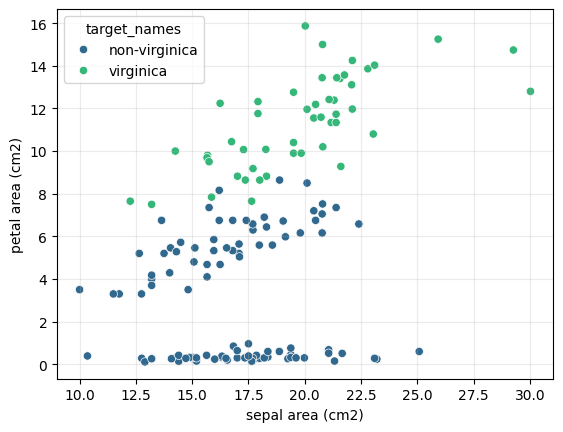

In [21]:
sns.scatterplot(data=df, x='sepal area (cm2)', y='petal area (cm2)', hue="target_names", palette="viridis")
plt.grid(alpha=0.25)
plt.show()

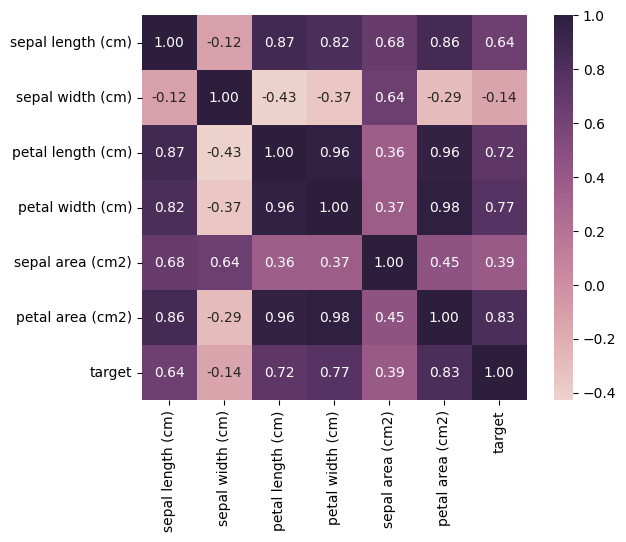

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal area (cm2)', 'petal area (cm2)','target']].corr(), annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True),fmt=".2f")
plt.show()

### **III - Data Preprocessing**

In [23]:
# Importing necessary libraries for train-test split
from sklearn.model_selection import train_test_split

# Extracting features (X) and target variable (y) for the model, removing 's2' due to multicollinearity
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'petal area (cm2)', 'sepal area (cm2)']]
y = df['target']

# Performing a two-way split for training (70%), validation (15%) and test (15%) sets using train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Display dimensions of the data sets
print("Train size  : ", X_train.shape)
print("Valid size  : ", X_val.shape)
print("Test size   : ", X_test.shape)

Train size  :  (105, 6)
Valid size  :  (22, 6)
Test size   :  (23, 6)


In [24]:
# Importing necessary libraries for regression and model evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
import numpy as np

In [25]:
# Creating a pipeline for polynomial regression with PolynomialFeatures, StandardScaler, and LinearRegression
def create_model_pipeline():
    # Define a pipeline with PolynomialFeatures, StandardScaler, and LinearRegression
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('logistic_regression', LogisticRegression(max_iter=1000))
    ])
    return pipeline

# List to store different regression models
model_list = {
    "log-feat-1" : create_model_pipeline(),
    "log-feat-2" : create_model_pipeline(),
    "log-feat-3" : create_model_pipeline(),
    "log-feat-4" : create_model_pipeline()
}

# Dictionary to store regression results for analysis and comparison
model_results = {
    "Model": [],
    "results_proba": [],
    "results_preds": [],
}

In [26]:
# X_train, y_train are features and labels in the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create features list for modelling
features_to_select = (
    ['petal area (cm2)'],
    ['petal length (cm)', 'petal width (cm)'],
    ['petal length (cm)', 'petal width (cm)', 'petal area (cm2)'],
    ['petal length (cm)', 'petal width (cm)', 'petal area (cm2)', 'sepal length (cm)']
)

# Perform cross-validation
for ind, mod in enumerate(model_list.keys()):
    y_pred_proba = model_list[mod].fit(X_train[features_to_select[ind]], y_train)
    # Evaluate model on validation set
    y_pred_proba = model_list[mod].predict_proba(X_val[features_to_select[ind]])[:, 1]
    y_pred = model_list[mod].predict(X_val[features_to_select[ind]])
    model_results["Model"].append(mod)
    model_results["results_proba"].append(y_pred_proba)
    model_results["results_preds"].append(y_pred)
    

In [35]:
# Generate tables and summarize data for each model
ind = 0
print(f"Model {model_results['Model'][ind]} Features used are {features_to_select[ind]}")
table_data = {
    'Instance Number': range(1, len(X_val) + 1),
    'Probability of Predicting Virginica': np.round(model_results['results_proba'][ind], 2),
    'Predicted Label': np.round(model_results['results_preds'][ind], 2),
    'Ground Truth': y_val
}
df_table = pd.DataFrame(table_data)
df_table

Model log-feat-1 Features used are ['petal area (cm2)']


,Instance Number,Probability of Predicting Virginica,Predicted Label,Ground Truth
59,1,0.26,0,0
91,2,0.31,0,0
86,3,0.35,0,0
133,4,0.39,0,1
57,5,0.16,0,0
148,6,0.72,1,1
107,7,0.65,1,1
134,8,0.41,0,1
141,9,0.68,1,1
52,10,0.37,0,0


In [37]:
# Generate tables and summarize data for each model
ind = 1
print(f"Model {model_results['Model'][ind]} Features used are {features_to_select[ind]}")
table_data = {
    'Instance Number': range(1, len(X_val) + 1),
    'Probability of Predicting Virginica': np.round(model_results['results_proba'][ind], 2),
    'Predicted Label': np.round(model_results['results_preds'][ind], 2),
    'Ground Truth': y_val
}
df_table = pd.DataFrame(table_data)
df_table

Model log-feat-2 Features used are ['petal length (cm)', 'petal width (cm)']


,Instance Number,Probability of Predicting Virginica,Predicted Label,Ground Truth
59,1,0.29,0,0
91,2,0.36,0,0
86,3,0.40,0,0
133,4,0.45,0,1
57,5,0.16,0,0
148,6,0.73,1,1
107,7,0.67,1,1
134,8,0.47,0,1
141,9,0.71,1,1
52,10,0.42,0,0


In [29]:
# Generate tables and summarize data for each model
ind = 2
print(f"Model {model_results['Model'][ind]} Features used are {features_to_select[ind]}")
table_data = {
    'Instance Number': range(1, len(X_val) + 1),
    'Probability of Predicting Virginica': np.round(model_results['results_proba'][ind], 2),
    'Predicted Label': np.round(model_results['results_preds'][ind], 2),
    'Ground Truth': y_val
}
df_table = pd.DataFrame(table_data)
df_table

Model log-feat-3 Features used are ['petal length (cm)', 'petal width (cm)', 'petal area (cm2)']


,Instance Number,Probability of Predicting Virginica,Predicted Label,Ground Truth
59,1,0.23,0,0
91,2,0.31,0,0
86,3,0.37,0,0
133,4,0.42,0,1
57,5,0.10,0,0
148,6,0.81,1,1
107,7,0.73,1,1
134,8,0.44,0,1
141,9,0.77,1,1
52,10,0.39,0,0


In [30]:
# Generate tables and summarize data for each model
ind = 3
print(f"Model {model_results['Model'][ind]} Features used are {features_to_select[ind]}")
table_data = {
    'Instance Number': range(1, len(X_val) + 1),
    'Probability of Predicting Virginica': np.round(model_results['results_proba'][ind], 2),
    'Predicted Label': np.round(model_results['results_preds'][ind], 2),
    'Ground Truth': y_val
}
df_table = pd.DataFrame(table_data)
df_table

Model log-feat-4 Features used are ['petal length (cm)', 'petal width (cm)', 'petal area (cm2)', 'sepal length (cm)']


,Instance Number,Probability of Predicting Virginica,Predicted Label,Ground Truth
59,1,0.20,0,0
91,2,0.31,0,0
86,3,0.40,0,0
133,4,0.43,0,1
57,5,0.08,0,0
148,6,0.79,1,1
107,7,0.78,1,1
134,8,0.43,0,1
141,9,0.79,1,1
52,10,0.44,0,0


After examining different ways to tell iris flowers apart, we made two interesting findings

**Petal Length and Width**:

* We found that using just the length and width of the petals to identify iris flowers was very effective. Even though other methods also gave the correct answers, this one stood out because it was more confident in its predictions.
* This tells us that the length and width of the petals are really important for telling iris flowers apart. So if we had to pick one method to identify virginica flowers, we'd choose this one because it's the most confident (Looking at prediction probabilities).

**Petal Area or Just One Petal Feature**:

* Another interesting finding was that using just the area of the petals also worked really well.
* This shows us that knowing the size of the petals, is enough to tell different iris flowers apart. So just focusing on the petals area alone can be an efficient choice for classification.

In [176]:
decision_boundary = -model_list['log-feat-1']["logistic_regression"].intercept_ / model_list['log-feat-1']["logistic_regression"].coef_
decision_boundary = model_list['log-feat-1']["scaler"].inverse_transform(decision_boundary)
decision_boundary

array([[9.14168813]])

In [177]:
combined_X = pd.concat([X_train, X_val], axis=0, ignore_index=True)
combined_y = pd.concat([y_train, y_val], axis=0, ignore_index=True)

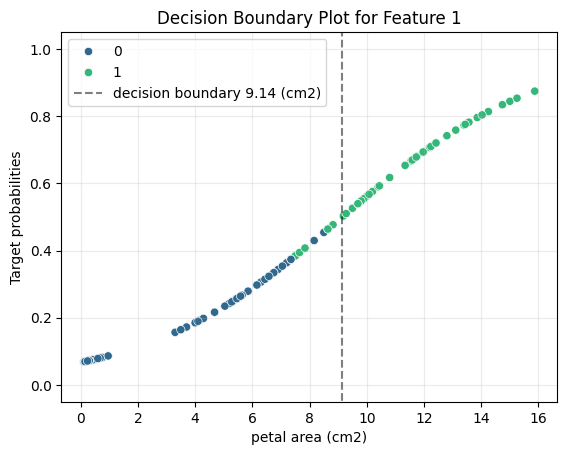

In [223]:

preds = model_list['log-feat-1'].predict_proba(combined_X[features_to_select[0]])[:,1]
sns.scatterplot(data=combined_X[features_to_select[0]], x='petal area (cm2)', y=preds, hue=combined_y, palette="viridis")
plt.vlines(x=decision_boundary, ymin=-1, ymax=1.5, color="black", linestyles="--", alpha=0.5, label=f"decision boundary {round(decision_boundary[0][0],2)} (cm2)")
plt.ylim((-0.05,1.05))
plt.ylabel("Target probabilities")
plt.title('Decision Boundary Plot for Feature 1')
plt.legend()
plt.grid(alpha=0.15)
plt.show()

In [220]:
# Retrieve the model parameters.
# Extract the intercept and coefficients from the trained logistic regression model.
b = model_list['log-feat-2']["logistic_regression"].intercept_[0]
w1, w2 = model_list['log-feat-2']["logistic_regression"].coef_[0].T

# Calculate the intercept and gradient of the decision boundary.
# Determine the intercept and slope of the decision boundary line.
c = -b/w2
m = -w1/w2

# Scale the combined feature values using the previously fitted scaler.
combined_X_scaled = model_list['log-feat-2']["scaler"].transform(combined_X[features_to_select[1]])

# Determine the minimum and maximum values for each feature after scaling.
xmin, xmax = combined_X_scaled[:,0].min(), combined_X_scaled[:,0].max()
ymin, ymax = combined_X_scaled[:,1].min(), combined_X_scaled[:,1].max()

# Define the x-values for plotting the decision boundary line.
xd = np.array([xmin, xmax])
# Calculate the corresponding y-values for the decision boundary line.
yd = m*xd + c

# Determine the minimum and maximum original feature values for plotting purposes.
x_min_orig = combined_X[features_to_select[1]].iloc[:, 0].min()
x_max_orig = combined_X[features_to_select[1]].iloc[:, 0].max()
y_max_orig = combined_X[features_to_select[1]].iloc[:, 1].max()
y_min_orig = combined_X[features_to_select[1]].iloc[:, 1].min()

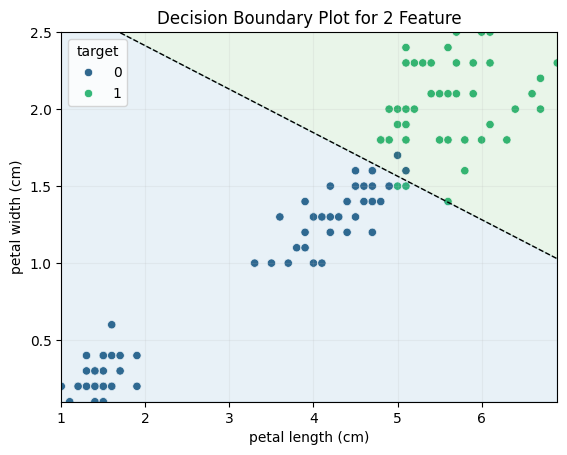

In [231]:
sns.scatterplot(x=combined_X[features_to_select[1]].iloc[:, 0], y=combined_X[features_to_select[1]].iloc[:, 1], hue=combined_y, palette="viridis")
plt.plot(xd*x_max_orig, yd*y_max_orig, 'k', lw=1, ls='--')
plt.fill_between(xd*x_max_orig, yd*y_max_orig, y_min_orig, color='tab:blue', alpha=0.1)
plt.fill_between(xd*x_max_orig, yd*y_max_orig, y_max_orig, color='tab:green', alpha=0.1)
plt.xlim(x_min_orig, x_max_orig)
plt.ylim(y_min_orig, y_max_orig)
plt.title('Decision Boundary Plot for 2 Feature')
plt.grid(alpha=0.15)
plt.show()

In [237]:
# Retrieve the model parameters.
# Extract the intercept and coefficients from the trained logistic regression model.
b = model_list['log-feat-3']["logistic_regression"].intercept_[0]
w1, w2, w3 = model_list['log-feat-3']["logistic_regression"].coef_[0].T

# Calculate the intercept and gradient of the decision boundary.
# Determine the intercept and slope of the decision boundary line.
c = -b/w3
m1 = -w1/w3
m2 = -w2/w3

# Scale the combined feature values using the previously fitted scaler.
combined_X_scaled = model_list['log-feat-3']["scaler"].transform(combined_X[features_to_select[2]])

# Determine the minimum and maximum values for each feature after scaling.
x1min, x1max = combined_X_scaled[:,0].min(), combined_X_scaled[:,0].max()
x2min, x2max = combined_X_scaled[:,1].min(), combined_X_scaled[:,1].max()
ymin, ymax = combined_X_scaled[:,2].min(), combined_X_scaled[:,2].max()

# Define the x-values for plotting the decision boundary line.
x1d = np.array([x1min, x1max])
x2d = np.array([x2min, x2max])
# Calculate the corresponding y-values for the decision boundary line.
yd = m1*x1d + m2*x2d + c

# Determine the minimum and maximum original feature values for plotting purposes.
x1_min_orig = combined_X[features_to_select[2]].iloc[:, 0].min()
x1_max_orig = combined_X[features_to_select[2]].iloc[:, 0].max()
x2_max_orig = combined_X[features_to_select[2]].iloc[:, 1].max()
x2_min_orig = combined_X[features_to_select[2]].iloc[:, 1].min()
y_max_orig = combined_X[features_to_select[2]].iloc[:, 2].max()
y_min_orig = combined_X[features_to_select[2]].iloc[:, 2].min()

In [252]:
import plotly.graph_objs as go

# Define the decision boundary line
x1d_mesh, x2d_mesh = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))
yd_mesh = m1 * x1d_mesh + m2 * x2d_mesh + c

# Create a 3D surface plot for the decision boundary
fig = go.Figure(data=[
    go.Surface(x=x1d_mesh*x1_max_orig, y=x2d_mesh*x2_max_orig, z=yd_mesh*y_max_orig, colorscale='Viridis', opacity=0.7),
])

# Add scatter plot for the original data points
fig.add_trace(go.Scatter3d(
    x=combined_X_scaled[:, 0]*x1_max_orig,
    y=combined_X_scaled[:, 1]*x2_max_orig,
    z=combined_X_scaled[:, 2]*y_max_orig,
    mode='markers',
    marker=dict(color=combined_y, colorscale='Viridis', opacity=0.8),
))

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='petal length (cm)', yaxis_title='petal width (cm)', zaxis_title='petal area (cm2)'))
# Set title
fig.update_layout(title='Decision Boundary Plot for Feature 3')
# Show plot
fig.show()